In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import torch
import numpy as np
import time
import inspect

import matplotlib.pyplot as plt
import torch.nn.functional as F


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

In [65]:
df = pd.read_csv("iris.csv", header=0)

In [66]:
df.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
mappings = {'versicolor' : 0, 'setosa': 1, 'virginica' : 2}
df["Species_Encoded"] = df['Species'].apply(lambda x: mappings[x])

In [167]:
X = df.drop(['Species', "Id", 'Species_Encoded'], axis =1)
y = df.Species_Encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42, shuffle=True)

In [168]:
y_train.shape, y_test.shape

((105,), (45,))

In [169]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

In [170]:
y_train.values

array([0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2])

In [171]:
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [172]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [173]:
X_train[0:5]

tensor([[5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000]])

In [174]:
len(X_train)

105

In [175]:
from torch import nn
from torch import optim

In [176]:
class My_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 8) #input
        self.fc2 = nn.Linear(8, 8)
        self.output = nn.Linear(8,3) # output

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = F.log_softmax(self.output(x), dim=1)

        return x


In [177]:
model = My_network()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.01)

epochs = 5000

train_losses = []
test_losses = []

for epoch in range(epochs):

    train_loss = 0
    #TRAINING 
    outputs = model.forward(X_train)
    loss = loss_function(outputs, y_train)

    # get gradient --BACKWARD PASS
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # update W, B

    train_loss += loss.item()

    #VALIDATION
    
    test_loss = 0
    with torch.no_grad():
        t_outputs = model.forward(X_test)

        t_loss = criterion(t_outputs, y_test)

        test_loss += t_loss.item()

        probs = F.softmax(t_outputs, dim =1)
        top_probs, top_class = probs.topk(1, dim =1)

        equals = top_class == y_test.view(*top_class.shape)
        accuracy = torch.mean(equals.type(torch.FloatTensor))

    train_losses.append(train_loss/(len(X_train)))
    test_losses.append(test_loss/len(X_test))


    #print(f"Epoch: {i}", f"TRAINING LOSS: {train_loss/len(X_train)}", f"TEST LOSS : {test_loss/len(X_test)}", f"TEST ACC : {accuracy}")    

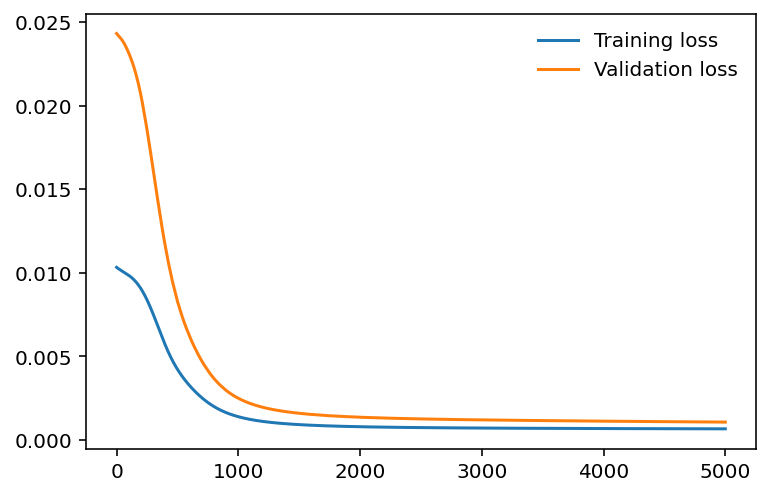

In [178]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [179]:
accuracy

tensor(1.)